In [10]:
!pip install selenium
# !pip install schedule
!pip install chromedriver

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
options=Options()
options.add_argument('--headless')
options.add_argument('--disable-gpu')   
options.add_argument('--window-size=1080,1080') # ここを追加する
options.add_argument('--blink-settings=imagesEnabled=false')
from time import sleep
import time
# import schedule
!pip install webdriver-manager

from webdriver_manager.chrome import ChromeDriverManager


# beautifulsoup

!pip install beautifulsoup4
!pip install requests
!pip install lxml

import requests
import json
from bs4 import BeautifulSoup
from lxml import etree

In [11]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 6.1 MB/s            
     |████████████████████████████████| 895 kB 6.6 MB/s            
     |████████████████████████████████| 2.2 MB 8.5 MB/s            
     |████████████████████████████████| 61 kB 1.9 MB/s            


In [ ]:
from transformers import pipeline 
classifier = pipeline('sentiment-analysis') 
results = classifier(["We are very happy to show you the 🤗 Transformers library.", 
           "We hope you don't hate it."]) 
for result in results: 
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/96.0.4664.45/chromedriver_mac64.zip
Driver has been saved in cache [/Users/kamei/.wdm/drivers/chromedriver/mac64/96.0.4664.45]
/var/folders/3s/8t76ryfn7wxdynwhv4z1g92m0000gn/T/ipykernel_80063/2139360195.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(ChromeDriverManager().install(),options=options)


自分：

 今日の天気は？


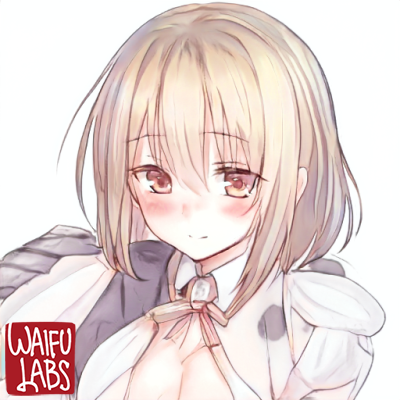

エー・ピーアイ：(金)は最高気温 12度、晴だよ。お散歩日和だね
自分：

In [ ]:
import requests
# from PIL import Image
from IPython.display import Image
from informalize import informalize
import subprocess

wife_number=1
browser = webdriver.Chrome(ChromeDriverManager().install(),options=options) 

# =========================================================================================================================
def weather(when):

    url="https://tenki.jp/forecast/3/17/4620/14151/"
    res=requests.get(url);
    soup = BeautifulSoup(res.content, "lxml")
    dom = etree.HTML(str(soup))
    try:
        if("今日" in when):

            date=dom.xpath('//*[@id="main-column"]/section/div[3]/section[1]/h3/span[1]')[0].text
            temperature=dom.xpath('//*[@id="main-column"]/section/div[3]/section[1]/div[1]/div[2]/dl/dd[1]/span[1]')[0].text
            weather=dom.xpath('//*[@id="main-column"]/section/div[3]/section[1]/div[1]/div[1]/p')[0].text
        elif("明日" in when):
            date=dom.xpath('//*[@id="main-column"]/section/div[3]/section[2]/h3/span[1]')[0].text
            temperature=dom.xpath('//*[@id="main-column"]/section/div[3]/section[2]/div[1]/div[2]/dl/dd[1]/span[1]')[0].text
            weather=dom.xpath('//*[@id="main-column"]/section/div[3]/section[2]/div[1]/div[1]/p')[0].text
        if "雨" in weather:
            return f"{date}は最高気温 {temperature}度、{weather}だよ。折り畳み傘を持っていった方がいいかもしれないね"
        if weather=="晴":
            return f"{date}は最高気温 {temperature}度、{weather}だよ。お散歩日和だね"
            
        else:
            return f"{date}は最高気温 {temperature}度、{weather}だよ"
    
    except:
        return "わからなかったよ"
    
def ytchan(chan):
    global browser
    url =f'https://www.youtube.com/results?search_query={chan}'
    browser.get(url)
    sleep(1)
    channel_icon=browser.find_element_by_xpath('//*[@id="avatar-section"]/a')

    browser.get(channel_icon.get_attribute("href")+"/videos")
    
    sleep(1)
    video_titles=browser.find_elements_by_xpath("//h3/a")
    filtered_video_titles=[]
    for i in range(len(video_titles)):
        if video_titles[i].text !="":
            filtered_video_titles.append(video_titles[i])

    video_details=browser.find_elements_by_xpath("//*[@id='metadata-line']/span[2]")
    filtered_video_details=[]
    for i in range(len(video_details)):
        if "ago" in video_details[i].text:
            filtered_video_details.append(video_details[i])
#     ------------------------------------------------------------------------------        
    for i in range(len(filtered_video_details)):

        if "1 day" in filtered_video_details[i].text or "hour" in filtered_video_details[i].text:
            
#         動画の詳細を一式表示---------------------------------------
            print(" ・ "+filtered_video_titles[i].text)
            print(filtered_video_titles[i].get_attribute("href"))
            print(filtered_video_details[i].text+"\n")
# =========================================================================================================================

# =========================================================================================================================
def jtalk(t):
    open_jtalk=['open_jtalk']
    mech=['-x','/usr/local/Cellar/open-jtalk/1.11/dic/']
    htsvoice=['-m','/usr/local/Cellar/open-jtalk/1.11/voice/mei/mei_bashful.htsvoice']
    speed=['-r','1.0']
    outwav=['-ow','open_jtalk.wav']
    cmd=open_jtalk+mech+htsvoice+speed+outwav
    subprocess.run(cmd,input=t.encode())
    afplay = ['afplay','open_jtalk.wav']
    subprocess.run(afplay)
# =========================================================================================================================

# =========================================================================================================================    
def text_chat(message):
    apikey = "DZZehuiLaJEoLHRKR2m2flEjNsXUrVxW"  #@param {type:"string",title:"キー入力"}
    talk_url = "https://api.a3rt.recruit.co.jp/talk/v1/smalltalk"
    payload = {"apikey": apikey, "query": message}
    response = requests.post(talk_url, data=payload)
    
    if "の天気" in message:
        
        first_response=weather(message)
        
        return first_response
    elif "wife:" in message:
        global wife_number
        wife_number=message.replace("wife:","")
        first_response=f"変わったよ"
        return first_response
    
    elif "youtube:" in message:
        ytchan(message.replace("youtube:",""))
        first_response="取得してきたよ"+"\n"
#         print("だよ")
        return first_response
    else:
    
        try:

            first_response=response.json()["results"][0]["reply"]

            first_response=informalize(first_response)

            return first_response
#         +"("+response.json()["results"][0]["reply"]+")"
        except:
            print(response.json())
            return "今なんていったの？"
# =========================================================================================================================
    
def main():
     while(True):
        print("自分：", end="")
        message = input()
        response=text_chat(message)
        display(Image(f'/Users/kamei/Desktop/Programs/自動化/chatbot/waifus/waifu ({wife_number}).png',width=250,height=250))
        print("エー・ピーアイ：" + response)
        jtalk(response)
        


if __name__ == "__main__":
     main()
        


NameError: name 'ncs' is not defined

In [1]:
pip install yt_dlp

Note: you may need to restart the kernel to use updated packages.


In [5]:
from yt_dlp import YoutubeDL

ydl_opts = {'outtmpl':'/Users/kamei/Downloads/%(title)s%(ext)s'}
with YoutubeDL(ydl_opts) as ydl:
    ydl.download(['https://www.youtube.com/watch?v=fnhyUx0h_JY'])

[youtube] fnhyUx0h_JY: Downloading webpage
[youtube] fnhyUx0h_JY: Downloading android player API JSON
[info] fnhyUx0h_JY: Downloading 1 format(s): 248+251
[download] Destination: /Users/kamei/Downloads/Processing Artwebm.f248.webm
[download] 100% of 46.41MiB in 00:03                          
[download] Destination: /Users/kamei/Downloads/Processing Artwebm.f251.webm
[download] 100% of 3.16MiB in 00:00                  
[Merger] Merging formats into "/Users/kamei/Downloads/Processing Artwebm.webm"
Deleting original file /Users/kamei/Downloads/Processing Artwebm.f248.webm (pass -k to keep)
Deleting original file /Users/kamei/Downloads/Processing Artwebm.f251.webm (pass -k to keep)


In [ ]:
pip install youtube_dl


In [28]:
# youtubeにアクセス
url = 'https://www.youtube.com/'


channel_list=["バーバパパ",
              "Rosemi Lovelock",
              "Ceres Fauna",
              "Petra Gurin",
              "Nanashi Mumei",
              "猫乃ユキノ",
              "兎桃みみこ"]
# 関数定義-------------------------------------------------------------
def get_video_id (url):
    url = url.replace("https://www.youtube.com/watch?v=", "").strip()
    return url

def change_to_command (id):
    id = "youtube-dl -i "+id
    return id

def spliter():
    print("\n"+
          "-----------------------------------------------------------------------------------------------------------------")
    
def search_channel(index):
    search_box=browser.find_element_by_id("search")
#     search_box=browser.find_element_by_xpath('//*[@id="search"]')
    search_box.click()
    for i in range(20):
        search_box.send_keys(Keys.BACK_SPACE)
    search_box.send_keys(channel_list[index])
    search_btn=browser.find_element_by_id("search-icon-legacy")
    search_btn.click()
    
def click_channel_icon():
    sleep(1)
    channel_icon=browser.find_element_by_class_name("channel-link")
    channel_icon.click()
    
def click_video_tab():
    sleep(1)
    video_tabs=browser.find_element_by_xpath("//*[@id='tabsContent']/tp-yt-paper-tab[2]/div")
    video_tabs.click()
# --------------------------------------------------------------------


    
def job():
    # chrome起動
    global browser
#     browser = webdriver.Chrome(ChromeDriverManager().install(),options=options)
    command_list=[] # 動画をダウンロードするコマンドを入れる
    browser.get(url)
    for channel_count in range(len(channel_list)):
        search_channel(channel_count)
        click_channel_icon()
        click_video_tab()

    #     取得してきた動画の詳細を、特定の条件の元フィルターする------------------------------------
        sleep(1)
        video_titles=browser.find_elements_by_xpath("//h3/a")
        filtered_video_titles=[]
        for i in range(len(video_titles)):
            if video_titles[i].text !="":
                filtered_video_titles.append(video_titles[i])
            
        video_details=browser.find_elements_by_xpath("//*[@id='metadata-line']/span[2]")
        filtered_video_details=[]
        for i in range(len(video_details)):
            if "ago" in video_details[i].text:
                filtered_video_details.append(video_details[i])
    #     ------------------------------------------------------------------------------        

        spliter()
        print("\n"+"■"+channel_list[channel_count])
        
        for i in range(len(filtered_video_details)):
        
            if "1 day" in filtered_video_details[i].text or "hour" in filtered_video_details[i].text:
        
    #         動画の詳細を一式表示---------------------------------------
                print(" ・ "+filtered_video_titles[i].text)
                print(filtered_video_titles[i].get_attribute("href"))
                print(filtered_video_details[i].text+"\n")
    #         -------------------------------------------------------

    #         動画をダウンロードするコマンドを command_list に入れる------------------
                command_list.append(
                    change_to_command(
                        get_video_id(
                            filtered_video_titles[i].get_attribute("href")
                        )
                    )
                )
    #         -------------------------------------------------------------
    
        spliter()

    spliter()
    print("cd Downloads")
    for i in range(len(command_list)):
        print(command_list[i])
    
    
    print("\n"+"done--------------------------------------------------------------------------------------------------------------")

    browser.quit()
    

In [6]:
from yt_dlp import YoutubeDL

ydl_opts = {'outtmpl': '%(id)s%(ext)s'}
with YoutubeDL(ydl_opts) as ydl:
    ydl.download(['https://www.youtube.com/watch?v=BaW_jenozKc'])

[youtube] BaW_jenozKc: Downloading webpage
[youtube] BaW_jenozKc: Downloading android player API JSON
[info] BaW_jenozKc: Downloading 1 format(s): 248+251
[download] Destination: BaW_jenozKcwebm.f248.webm
[download] 100% of 965.31KiB in 00:00                  
[download] Destination: BaW_jenozKcwebm.f251.webm
[download] 100% of 138.96KiB in 00:00                  
[Merger] Merging formats into "BaW_jenozKcwebm.webm"
Deleting original file BaW_jenozKcwebm.f248.webm (pass -k to keep)
Deleting original file BaW_jenozKcwebm.f251.webm (pass -k to keep)
